### Trigonometric Functions
We already saw the graph of the function $y = \sin(x)$. But then again, how do we define the trigonometric functions? Let's quickly review that.

![Right triangle](img/angle-in-right-triangle.png)

The two basic trigonometric functions are defined as the ratio of two sides:
$$ \sin(x) = \frac{\text{opposite}}{\text{hypotenuse}} $$
$$ \cos(x) = \frac{\text{adjacent}}{\text{hypotenuse}} $$

And also:
$$ \tan(x) = \frac{\text{opposite}}{\text{adjacent}} = \frac{\sin(x)}{\cos(x)} $$
$$ \cot(x) = \frac{\text{adjacent}}{\text{opposite}} = \frac{\cos(x)}{\sin(x)} $$

This is fine, but using this, "right-triangle" definition, we're able to calculate the trigonometric functions of angles up to $90^\circ$. But we can do better. Let's now imagine a circle centered at the origin of the coordinate system, with radius $r = 1$. This is called a "unit circle".

![Trigonometric unit circle](img/triangle-unit-circle.png)

We can now see exactly the same picture. The $x$-coordinate of the point in the circle corresponds to $\cos(\alpha)$ and the $y$-coordinate - to $\sin(\alpha)$. What did we get? We're now able to define the trigonometric functions for all degrees up to $360^\circ$. After that, the same values repeat: these functions are **periodic**: 
$$ \sin(k.360^\circ + \alpha) = \sin(\alpha), k = 0, 1, 2, \dots $$
$$ \cos(k.360^\circ + \alpha) = \cos(\alpha), k = 0, 1, 2, \dots $$

We can, of course, use this picture to derive other identities, such as:
$$ \sin(90^\circ + \alpha) = \cos(\alpha) $$

A very important property of the sine and cosine is that they accept values in the range $(-\infty; \infty)$ and produce values in the range $[-1; 1]$. The two other functions take values in the range $(-\infty; \infty)$ **except when their denominators are zero** and produce values in the same range. 

#### Radians
A degree is a geometric object, $1/360$th of a full circle. This is quite inconvenient when we work with angles. There is another, natural and intrinsic measure of angles. It's called the **radian** and can be written as $\text{rad}$ or without any designation, so $\sin(2)$ means "sine of two radians".

![Radian definition](img/radian.gif)

It's defined as *the central angle of an arc with length equal to the circle's radius* and $1\text{rad} \approx 57.296^\circ$.

We know that the circle circumference is $C = 2\pi r$, therefore we can fit exactly $2\pi$ arcs with length $r$ in $C$. The angle corresponding to this is $360^\circ$ or $2\pi\ \text{rad}$. Also, $\pi \text{rad} = 180^\circ$.

(Some people prefer using $\tau = 2\pi$ to avoid confusion with always multiplying by 2 or 0.5 but we'll use the standard notation here.)

**NOTE:** All trigonometric functions in `math` and `numpy` accept radians as arguments. In order to convert between radians and degrees, you can use the relations $\text{[deg]} = 180/\pi.\text{[rad]}, \text{[rad]} =  \pi/180.\text{[deg]}$. This can be done using `np.deg2rad()` and `np.rad2deg()` respectively.

#### Inverse trigonometric functions
All trigonometric functions have their inverses. If you plug in, say $\pi/4$ in the $\sin(x)$ function, you get $\sqrt{2}/2$. The inverse functions (also called, arc-functions) take arguments in the interval $[-1; 1]$ and return the angle that they correspond to. Take arcsine for example:
$$ \arcsin(y) = x: sin(x) = y $$
$$ \arcsin\left(\frac{\sqrt{2}}{2}\right) = \frac{\pi}{4} $$

Please note that this is NOT entirely correct. From the relations we found:
$$\sin(x) = sin(2k\pi + x), k = 0, 1, 2, \dots $$

it follows that $\arcsin(x)$ has infinitely many values, separated by $2k\pi$ radians each:
$$ \arcsin\left(\frac{\sqrt{2}}{2}\right) = \frac{\pi}{4} + 2k\pi, k = 0, 1, 2, \dots $$

In most cases, however, we're interested in the first value (when $k = 0$). It's called the **principal value**.

Note 1: There are inverse functions for all four basic trigonometric functions: $\arcsin$, $\arccos$, $\arctan$, $\text{arccot}$. These are sometimes written as $\sin^{-1}(x)$, $\cos^{-1}(x)$, etc. These definitions are completely equivalent. 

Just notice the difference between $\sin^{-1}(x) := \arcsin(x)$ and $\sin(x^{-1}) = \sin(1/x)$.

#### Exercise
Use the plotting function you wrote in the previous task to plot the inverse trigonometric functions. Use `numpy` (look up how to use inverse trigonometric functions).

In [18]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
from matplotlib.ticker import ScalarFormatter
from matplotlib.transforms import ScaledTranslation
from collections.abc import Callable

In [19]:
# Hide one of the zeroes in the center.
class HideZeroFormatter(ScalarFormatter):
    """ Display an empty label if value == 0."""
    def __call__(self, value, pos=None):
        return '' if value == 0 else ScalarFormatter.__call__(self, value, pos)

def move_zero_tick_label(axis):
    labels = axis.get_majorticklabels()
    for label in labels:
        if label.get_text() == "0":
            label.set_transform(label.get_transform() + ScaledTranslation(-0.1, 0, axis.figure.dpi_scale_trans))

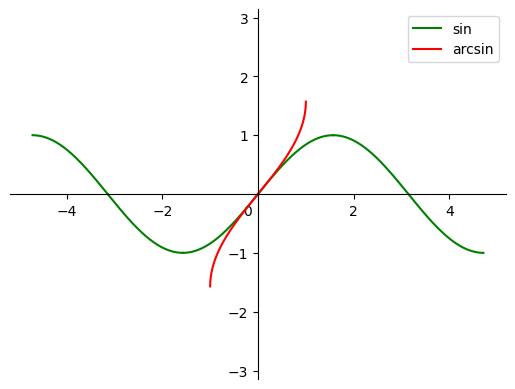

In [20]:
def plot_trigonometric_functions(f1: Callable, f2: Callable, x_arc_domain: ndarray):
    x_domain = np.linspace(-np.pi/2, np.pi/2, 1000) 
    x_domain = x_domain[1:-1]

    # Stylize the plot.
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.set_major_formatter(HideZeroFormatter())

    # NB: Draw the first function in PARTS (in order to prevent a bug related to HORIZONTAL lines in the "tan" function)
    n = 3 # k = 0, +/-1, +/-2, +/-3, ..., +/-n
    for k in range(-n, n):
        x_domain = np.linspace(k * np.pi / 2, (k + 1) * np.pi / 2, 1000)
        x_domain = x_domain[1:-1] # remove both ends
        # In the last plotting add a label (for the sake of the legend)
        if k == n-1:
            plt.plot(x_domain, f1(x_domain), color="g", label=f1.__name__)
        else:
            plt.plot(x_domain, f1(x_domain), color="g")

    plt.plot(x_arc_domain, f2(x_arc_domain), color="r", label=f2.__name__)

    # Show the plot
    plt.ylim(-np.pi, np.pi) # Set proper y-limits of the current Axes, this is needed for the tan/cotan functions
    plt.legend()
    ax.legend(loc='upper right')
    move_zero_tick_label(ax.xaxis)
    plt.show()

def cotan(x):
    return np.cos(x)/np.sin(x)

def arccotan(x):
    return np.pi / 2 - np.arctan(x)

plot_trigonometric_functions(np.sin, np.arcsin, np.linspace(-1, 1, 1000)) # the arcsin works only within [-1, 1] domain

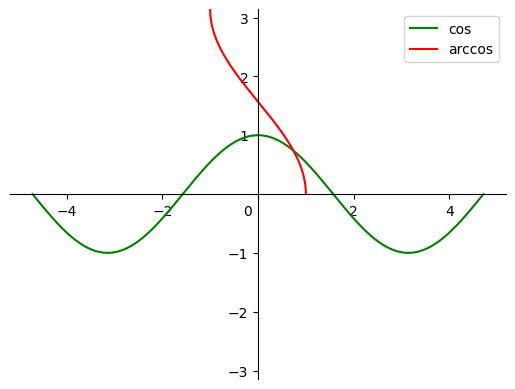

In [21]:
plot_trigonometric_functions(np.cos, np.arccos, np.linspace(-1, 1, 1000)) # the arccosworks only within [-1, 1] domain

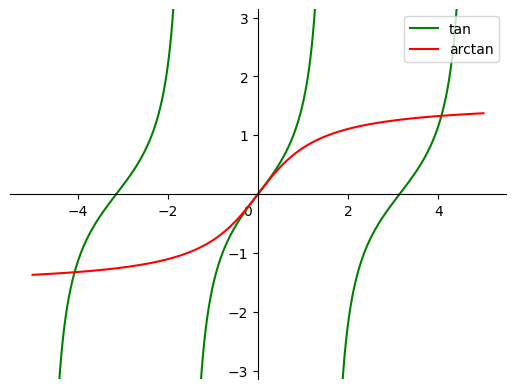

In [22]:
plot_trigonometric_functions(np.tan, np.arctan, np.linspace(-5, 5, 1000))

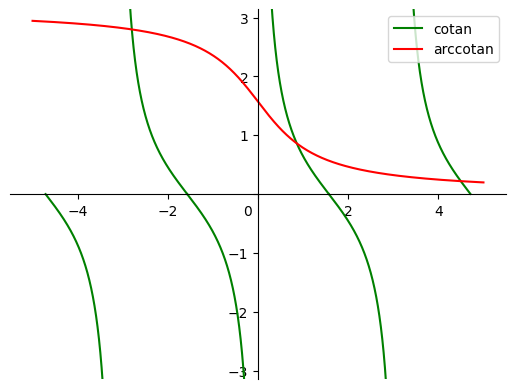

In [23]:
plot_trigonometric_functions(cotan, arccotan, np.linspace(-5, 5, 1000))